# IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# EXTRACTING DATA

In [2]:
A = pd.read_excel("E:/sales_data.xlsx")

In [3]:
A

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,173946,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4996,173987,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4997,174004,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4998,174038,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,1,0,0.00,0.00,117.49,0.00


# CHECKING FOR NULL VALUES

In [4]:
A.isnull().sum()

CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_000

# Here we are calculating recency for customers who had made a purchase with a company.

In [5]:
A_recency = A.groupby(by='CustomerID',
                        as_index=False)['FIRST_ORDER_DATE'].max()
A_recency.columns = ['CustomerID', 'LATEST_ORDER_DATE']
recent_date = A_recency['LATEST_ORDER_DATE'].max()
A_recency['Recency'] = A_recency['LATEST_ORDER_DATE'].apply(
    lambda x: (recent_date - x).days)
A_recency

,CustomerID,LATEST_ORDER_DATE,Recency
0,1,2020-03-03,600
1,2,2019-02-13,984
2,3,2018-02-15,1347
3,4,2016-10-01,1849
4,5,2015-12-27,2128
...,...,...,...
4995,248709,2015-01-03,2486
4996,248710,2014-12-13,2507
4997,259042,2014-08-02,2640
4998,266024,2014-11-14,2536


# We are here calculating the frequency of frequent transactions of the customer..

In [20]:
frequency_A = A.drop_duplicates().groupby(
    by=['TOTAL_ORDERS'], as_index=False)['LATEST_ORDER_DATE','CustomerID'].count()
frequency_A.columns = ['CustomerID','TOTAL_ORDERS', 'Frequency']
frequency_A.head(20)

,CustomerID,TOTAL_ORDERS,Frequency
0,1,366,366
1,2,560,560
2,3,509,509
3,4,360,360
4,5,238,238
5,6,206,206
6,7,149,149
7,8,123,123
8,9,115,115
9,10,89,89


In [54]:
frequency_A.head(50)

,CustomerID,TOTAL_ORDERS,Frequency
0,1,366,366
1,2,560,560
2,3,509,509
3,4,360,360
4,5,238,238
5,6,206,206
6,7,149,149
7,8,123,123
8,9,115,115
9,10,89,89


# We are here calculating the MONETARY of frequent transactions of the customer in ordering/buying some product from the company.

In [23]:
A['Total'] = A['TOTAL_ORDERS']
monetary_A = A.groupby(by='CustomerID', as_index=False)['TOTAL_ORDERS','REVENUE'].sum()
monetary_A.columns = ['CustomerID','TOTAL_ORDERS','Monetary']
monetary_A

,CustomerID,TOTAL_ORDERS,Monetary
0,1,61,34847.40
1,2,59,32486.98
2,3,53,24178.97
3,4,84,18554.49
4,5,26,16884.99
...,...,...,...
4995,248709,2,59.95
4996,248710,2,59.94
4997,259042,2,51.94
4998,266024,2,45.94


In [24]:
rf_A = A_recency.merge(frequency_A, on='CustomerID')
rfm_A = rf_A.merge(monetary_A, on='CustomerID').drop(
    columns='LATEST_ORDER_DATE')
rfm_A

,CustomerID,Recency,TOTAL_ORDERS_x,Frequency,TOTAL_ORDERS_y,Monetary
0,1,600,366,366,61,34847.40
1,2,984,560,560,59,32486.98
2,3,1347,509,509,53,24178.97
3,4,1849,360,360,84,18554.49
4,5,2128,238,238,26,16884.99
...,...,...,...,...,...,...
80,109,2183,1,1,20,6634.07
81,111,1988,1,1,22,6505.59
82,124,366,1,1,55,6263.44
83,128,1380,1,1,17,6164.75


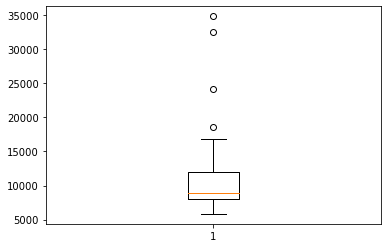

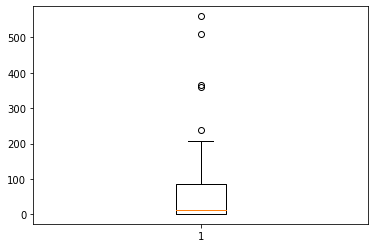

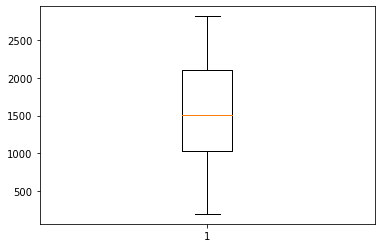

In [25]:
plt.boxplot(rfm_A['Monetary'])
plt.show()
plt.boxplot(rfm_A['Frequency'])
plt.show()
plt.boxplot(rfm_A['Recency'])
plt.show()

In [26]:
q1_rev = rfm_A['Monetary'].quantile(0.05)
q3_rev= rfm_A['Monetary'].quantile(0.95)
IQR = q3_rev - q1_rev
rfm_A = rfm_A[(rfm_A['Monetary'] >= q1_rev - 1.5*IQR) & (rfm_A['Monetary'] <= q3_rev + 1.5*IQR)]

q1_freq = rfm_A['Frequency'].quantile(0.05)
q3_freq = rfm_A['Frequency'].quantile(0.95)
IQR = q3_freq - q1_freq
rfm_A = rfm_A[(rfm_A['Frequency'] >= q1_freq - 1.5*IQR) & (rfm_A['Frequency'] <= q3_freq + 1.5*IQR)]

q1_rec = rfm_A['Recency'].quantile(0.05)
q3_rec = rfm_A['Recency'].quantile(0.95)
IQR = q3_rec - q1_rec
rfm_A = rfm_A[(rfm_A['Recency'] >= q1_rec - 1.5*IQR) & (rfm_A['Recency'] <= q3_rec + 1.5*IQR)]

# STANDARDIZATION OF DATA

In [27]:
scale = StandardScaler()
cols = ['Monetary', 'Frequency', 'Recency']
rfm_scaler = scale.fit_transform(rfm_A[cols])

In [28]:
rfm_scaled = pd.DataFrame(rfm_scaler)
rfm_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_scaled.head()

,Monetary,Frequency,Recency
0,3.110320,4.904050,0.371101
1,2.509762,3.013851,0.759857
2,2.440979,2.518061,1.235004
3,2.191388,1.634935,-0.027409
4,2.133984,1.232106,-0.399445


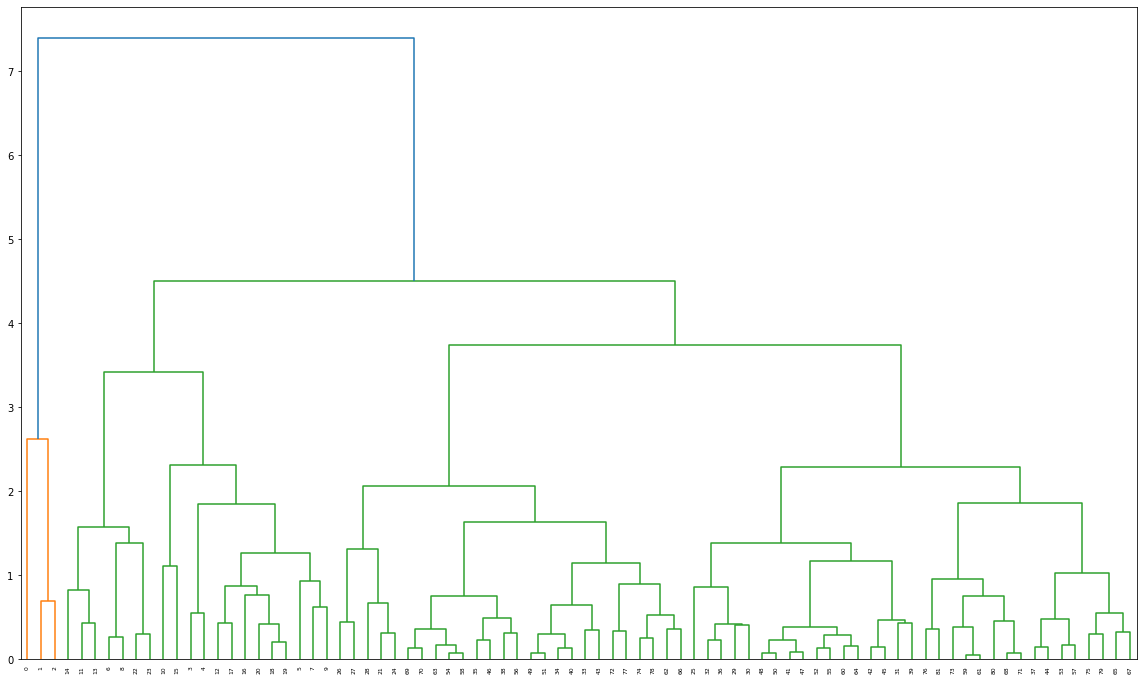

In [29]:
plt.figure(figsize=(20,12))

mergings = linkage(rfm_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

# CREATING CLUSTERS

In [30]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
pd.set_option('display.max_rows', None)
rfm_A['cluster_labels'] = cluster_labels
rfm_A.head(200)
rfm_A=

,CustomerID,Recency,TOTAL_ORDERS_x,Frequency,TOTAL_ORDERS_y,Monetary,cluster_labels
3,4,1849,360,360,84,18554.49,0
4,5,2128,238,238,26,16884.99,0
5,6,2469,206,206,66,16693.78,0
6,7,1563,149,149,81,15999.94,1
7,8,1296,123,123,19,15840.36,1
8,9,2019,115,115,75,14526.72,1
9,10,1052,89,89,47,14309.92,1
10,11,1799,81,81,47,14153.58,1
11,12,1025,78,78,79,13775.96,1
12,13,1417,98,98,32,13653.62,1


# EDA

<AxesSubplot:xlabel='cluster_labels', ylabel='Recency'>

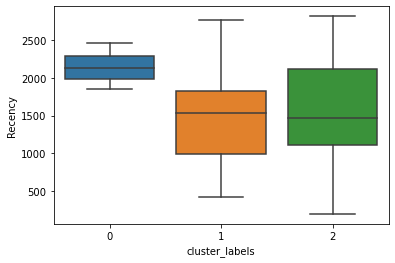

In [32]:
sns.boxplot(x='cluster_labels', y='Recency', data=rfm_A)

<AxesSubplot:xlabel='cluster_labels', ylabel='Frequency'>

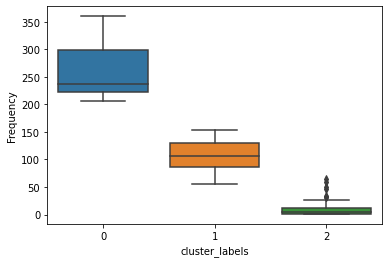

In [33]:
sns.boxplot(x='cluster_labels', y='Frequency', data=rfm_A)

<AxesSubplot:xlabel='cluster_labels', ylabel='Monetary'>

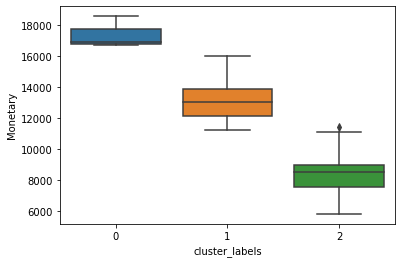

In [34]:
sns.boxplot(x='cluster_labels', y='Monetary', data=rfm_A)

In [35]:
rfm_A['R_rank'] = rfm_A['Recency'].rank(ascending=False)
rfm_A['F_rank'] = rfm_A['Frequency'].rank(ascending=True)
rfm_A['M_rank'] = rfm_A['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_A['R_rank_norm'] = (rfm_A['R_rank']/rfm_A['R_rank'].max())*100
rfm_A['F_rank_norm'] = (rfm_A['F_rank']/rfm_A['F_rank'].max())*100
rfm_A['M_rank_norm'] = (rfm_A['F_rank']/rfm_A['M_rank'].max())*100
 
rfm_A.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_A.head()

,CustomerID,Recency,TOTAL_ORDERS_x,Frequency,TOTAL_ORDERS_y,Monetary,cluster_labels,R_rank_norm,F_rank_norm,M_rank_norm
3,4,1849,360,360,84,18554.49,0,39.024390,100.000000,100.000000
4,5,2128,238,238,26,16884.99,0,21.951220,98.780488,98.780488
5,6,2469,206,206,66,16693.78,0,15.853659,97.560976,97.560976
6,7,1563,149,149,81,15999.94,1,48.780488,95.121951,95.121951
7,8,1296,123,123,19,15840.36,1,69.512195,89.024390,89.024390


In [46]:
rfm_A=rfm_A.drop(labels=['TOTAL_ORDERS_x','TOTAL_ORDERS_y'],axis=1)

# CALCULATIONG RANK_SCORE

In [47]:
rfm_A['RFM_Score'] = 0.15*rfm_A['R_rank_norm']+0.28 * \
    rfm_A['F_rank_norm']+0.57*rfm_A['M_rank_norm']
rfm_A['RFM_Score'] *= 0.05
rfm_A = rfm_A.round(2)
rfm_A[['CustomerID', 'RFM_Score']].sort_values(by=["RFM_Score"],ascending=True)

,CustomerID,RFM_Score
73,82,0.62
66,69,0.64
72,81,0.68
75,84,0.73
80,109,0.75
52,53,0.78
81,111,0.85
77,88,0.86
69,75,0.92
55,56,0.97


In [48]:
rfm_A["Customer_segment"] = np.where(rfm_A['RFM_Score'] >
                                      3.5, "champians",
                                      (np.where(
                                        rfm_A['RFM_Score'] > 3,
                                        "potential",
                                        (np.where(
    rfm_A['RFM_Score'] > 2.5,
                             "potential",
                             np.where(rfm_A['RFM_Score'] > 2,
                            'need attention', 'Lost Customers'))))))
rfm_A[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)


,CustomerID,RFM_Score,Customer_segment
3,4,4.54,champians
4,5,4.36,champians
5,6,4.27,champians
6,7,4.41,champians
7,8,4.30,champians
8,9,3.85,champians
9,10,3.98,champians
10,11,3.57,champians
11,12,3.79,champians
12,13,3.96,champians


# VISUALIZATION OF DATA

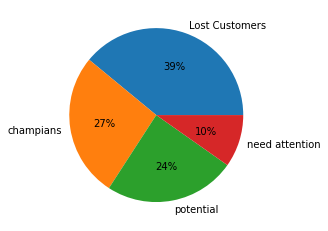

In [49]:
import matplotlib.pyplot as plt
plt.pie(rfm_A.Customer_segment.value_counts(),
        labels=rfm_A.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()